In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
%matplotlib inline

In [2]:
path_leivis = '../data/interim/leivis'
path_dicionario = '../data/dicionario.csv'

In [3]:
df = pd.read_csv(f'{path_leivis}/output_full.csv', low_memory=False).drop('Unnamed: 0', axis=1)
f'Consumo de memória em MB: {round(df.memory_usage(deep=True).sum() / (1024*1024), 2)} MB'

'Consumo de memória em MB: 146.93 MB'

In [4]:
print(df.columns)

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
       'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
       'FRAQUEZA', 'EDEMA', 'EMAGRA', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
       'DIAG_PAR_N', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
       'COUFINF', 'COPAISINF', 'COMUNINF', 'DOENCA_TRA', 'EVOLUCAO',
       'DT_OBITO', 'DT_ENCERRA', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
       'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
       'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
       'CO_PAIS_3', 'DS_TRANS_3'],
      

In [5]:
# dicionário dos dados: para facilitar consulta apenas
dic = pd.read_csv(path_dicionario, sep='\t')
dic.columns = ['id', 'tipo', 'categorias', 'descricao', 'caracteristicas', 'dbf']
cols = list(set(dic.dbf).intersection(set(df.columns)))
dic = dic.set_index('dbf')
dic = dic.loc[cols, ['categorias', 'descricao', 'caracteristicas']]

## Visualizando a descrição dos dados junto com o dicionário 
corra as células para ver descrição das variáveis

In [6]:
# do tipo objeto
pd.concat([
    df.describe(include='object').T, dic.loc[df.describe(include='object').T.index, :]
], axis=1
)

,count,unique,top,freq,categorias,descricao,caracteristicas
ID_AGRAVO,122502,1,B550,122502,B55.0 – Leishmaniose Visceral,Agravo/doença,NaN
DT_NOTIFIC,122502,4732,2019-09-05,144,NaN,Data da Notificação: data e hora,NaN
DT_SIN_PRI,122502,5093,2019-09-05,114,NaN,Data dos Primeiros Sintomas,NaN
DT_NASC,121218,29430,2006-06-29,24,NaN,Data de Nascimento do Paciente,NaN
CS_SEXO,122502,3,M,74367,\nM - Masculino\nF - Feminino\nI - Ignorado\n,Sexo do paciente,NaN
DT_INVEST,98931,4058,2019-09-05,142,NaN,Data em que ocorreu a investigação – informar a data da 1a visita ao paciente,Campo obrigatório\nData da investigação > ou = data\nda notificação
ID_OCUPA_N,39200,1341,999991.0,7552,NaN,"Informar a atividade exercida pelo paciente\nno setor formal, informal\nou autônomo ou sua última atividade exercida\nquando paciente for desempregado. O ramo\nde atividade econômica do paciente refere-se as\natividades econômicas desenvolvidas nos\nprocessos de produção do setor primário\n(agricultura e extrativismo); secundário\n(indústria) ou terciário\n(serviços e comércio)",NaN
OUTROS_ESP,23364,8217,DOR ABDOMINAL,1641,NaN,Especificar outros sinais\ne sintomas que o\npaciente apresenta,Campo essencial. Se campo\nSinais e Sintomas(Outros)=1\n(sim).
TRATAMENTO,34320,3619,2018-03-23,28,NaN,Informar a data do início do tratamento,Campo essencial\nData deve ser >= a data da\nnotificação
DT_OBITO,5384,2624,2017-05-08,9,NaN,Informar a data do\nÓbito,Campo Obrigatório se\ncampo Evolução do\nCaso = 3 ou 4 (óbito)\nData do Óbito deve ser\nmaior ou igual à Data\ndos Primeiros Sintomas\nCampo habilitado se\ncampo Evolução= 3-\nÓbito por LV ou 4-Óbito\npor outras causas.\n


In [7]:
# do tipo numérico
pd.concat([
    df.describe().loc[['count', 'mean', 'std', 'min', 'max'], :].T, dic.loc[df.describe().T.index, :]
], axis=1
)

,count,mean,std,min,max,categorias,descricao,caracteristicas
TP_NOT,122502.0,2.000000,0.000000,2.0,2.0,2 – Individual,Tipo da notificação,NaN
SEM_NOT,122502.0,200976.552105,8759.347315,814.0,202001.0,NaN,Semanas do calendário\nEpidemiológico\npadronizado.Semana epidemiológica que o caso\nfoi notificado.,NaN
NU_ANO,122502.0,2013.340264,3.662893,2007.0,2019.0,NaN,NaN,NaN
SG_UF_NOT,122502.0,25.278363,9.909309,11.0,53.0,NaN,Sigla da UF de Notificação,NaN
ID_MUNICIP,122502.0,253869.190919,99361.701741,110004.0,530010.0,NaN,Id do município de Notificação (código IBGE),NaN
ID_REGIONA,96817.0,1577.908126,502.239498,1331.0,6256.0,Campo com código da regional de saúde da tabela de município do sistema,Regional de saúde onde está localizado o município da unidade de saúde ou outra fonte notificadora,NaN
SEM_PRI,122502.0,200904.648145,9390.154690,644.0,202001.0,Semana epidemiológica dos\nprimeiros sintomas/ diagnósticos.\n(campo interno),\nSemanas do calendário\nepidemiológico padronizado. Semana epidemiológica dos números\nsintomas.,NaN
NU_IDADE_N,122502.0,3942.691279,307.049248,5.0,4120.0,NaN,NaN,NaN
CS_GESTANT,122501.0,5.895323,0.615877,1.0,9.0,1-1oTrimestre\n2-2oTrimestre\n3-3oTrimestre\n4- Idade gestacional Ignorada\n5-Não\n6- Não se aplica\n9-Ignorado\n,Se paciente é gestante,NaN
CS_RACA,119557.0,3.664788,1.785568,1.0,9.0,\n1-Branca\n4-Parda\n2-Preta\n3-Amarela\n5-Indígena \n9- Ignorado,Raça/Cor,NaN


## Dividindo os dados de acordo com a classificação final

- classificação final, CLASSI_FIN: 
    - 1 = confirmado; 
    - 2 = descartado.

In [8]:
df.CLASSI_FIN.value_counts(dropna=False).to_frame()

,CLASSI_FIN
2.0,65326
1.0,47853
NaN,4952
8.0,4371


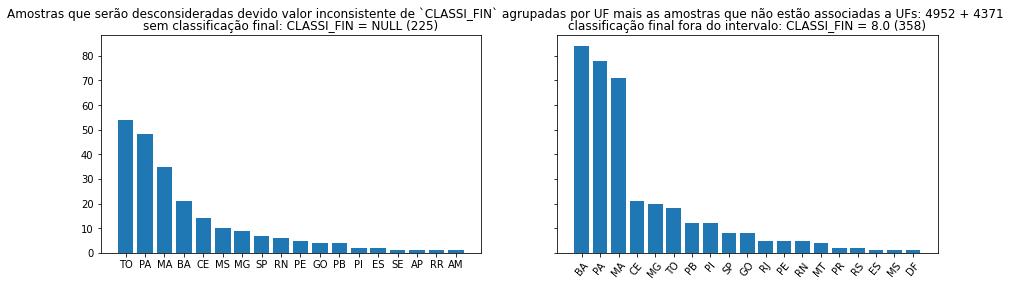

In [9]:
null = df.loc[
    df.CLASSI_FIN.isnull(), :
].groupby('COUFINF')['COUFINF'].count().sort_values(ascending=False)

invalid = df.loc[
    df.CLASSI_FIN == 8, :
].groupby('COUFINF')['COUFINF'].count().sort_values(ascending=False)

ufs = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO', 21: 'MA', 22: 'PI', 23: 'CE',
    24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS', 50: 'MT', 51: 'MS', 52: 'GO', 53: 'DF'
}
null.index = null.index.map(ufs)
invalid.index = invalid.index.map(ufs)


fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
axs[0].bar(null.index, null.values)
axs[0].set_title(f'sem classificação final: CLASSI_FIN = NULL ({null.values.sum()})')
axs[1].bar(invalid.index, invalid.values)
axs[1].set_title(f'classificação final fora do intervalo: CLASSI_FIN = 8.0 ({invalid.values.sum()})')
plt.xticks(rotation=50)

fig.suptitle("""Amostras que serão desconsideradas devido valor inconsistente de `CLASSI_FIN` agrupadas por UF\
 mais as amostras que não estão associadas a UFs: 4952 + 4371""")
plt.show()

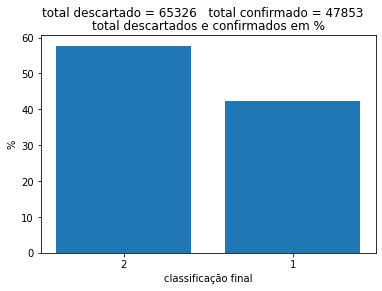

In [10]:
data = df.loc[
    (df.CLASSI_FIN == 1.0) | (df.CLASSI_FIN == 2.0), :
].groupby('CLASSI_FIN')['CLASSI_FIN'].count().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(data.index.astype(int).astype('string'), data.values/data.sum()*100)
ax.set_title('total descartados e confirmados em %')
fig.suptitle(f'total descartado = {data.iloc[0]}   total confirmado = {data.iloc[1]}')

ax.set_ylabel('%')
ax.set_xlabel('classificação final')

plt.show()

In [11]:
confirmados = df.loc[(df.CLASSI_FIN == 1.0), :].copy()
confirmados.columns = ['TP_NOT', 'ID_AGRAVO', 'DT_NOT', 'SEMANA_NOT', 'ANO', 'CO_UF_NOT',
                       'CO_MN_NOT', 'ID_REGIONA', 'DT_PRI_SIN', 'SEMANA_PRI_SIN', 'DT_NASC',
                       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_UF_RESI',
                       'CO_MN_RESI', 'ID_RG_RESI', 'CO_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
                       'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
                       'FRAQUEZA', 'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
                       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
                       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
                       'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
                       'CO_UF_INF', 'CO_PAIS_INF', 'CO_MN_INF', 'DOENCA_TRABALHO', 'EVOLUCAO',
                       'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
                       'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
                       'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
                       'CO_PAIS_3', 'DS_TRANS_3'
                      ]

In [12]:
confirmados.describe(include='all').T
#df.describe().T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TP_NOT,47853,NaN,NaN,NaN,2,0,2,2,2,2,2
ID_AGRAVO,47853,1,B550,47853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DT_NOT,47853,4625,2011-09-05,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEMANA_NOT,47853,NaN,NaN,NaN,200979,8228.78,836,201006,201323,201640,202001
ANO,47853,NaN,NaN,NaN,2012.91,3.71685,2007,2010,2013,2016,2019
...,...,...,...,...,...,...,...,...,...,...,...
DT_DESLC3,53,50,2014-05-30,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS_MUN_3,65,NaN,NaN,NaN,328495,97996.2,110094,270630,315120,354340,521523
CO_UF_3,72,NaN,NaN,NaN,32.4167,9.56335,11,27.75,31,35,52
CO_PAIS_3,26281,NaN,NaN,NaN,0.00764811,0.779041,0,0,0,0,126


## Excluindo duplicidades: de acordo com coluna `NDUPLIC_N`
- se igual a 2.0, é duplicidade

In [13]:
print((confirmados.NDUPLIC_N == 2).sum())
confirmados.drop(confirmados.loc[confirmados.NDUPLIC_N == 2, :].index, axis=0, inplace=True)

23


## Excluindo colunas desnecessárias

In [14]:
confirmados.drop(
    ['CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'NDUPLIC_N', 
     'TP_NOT', 'ID_REGIONA', 'ID_RG_RESI', 'ID_AGRAVO', 'CLASSI_FIN'
    ],
    axis=1,
    inplace=True
)

## Base `confirmados`

Tem vários testes de consistência a serem feitos, mas o mais essencial é definir uma parcela de dados o mais confiável possível para analisar.

Campos importantes: 
Alguns campos são importantes para cálculo de alguns indicadores, entretanto há valores faltantes que limitam os dados para cálculo.

- `ENTRADA` se o caso é novo ou rescidiva.
- `CO_MN_INF`, `CO_UF_INF` (local de infecção)
- `CO_MN_RESI`, `CO_UF_RESI` (local residencia)

Nenhuma amostra foi excluída, apenas os 23 campos supostamente duplicados, indicados pela coluna `NDUPLIC_N`.
Também foram desconsideradas, por enquanto, as amostras de casos descartados (CLASSI_FIN = 2)

Como não é possível, a princípio, imputar esses dados faltantes por falta de conhecimento dos sistemas que alimentam a base as linhas que possuem esses dados faltantes também serão desconsideradas.

`ENTRADA`

Questionamento: o que significa o valor transferência (3), em `ENTRADA`?
Seria um caso notificado em um local e o tratamento transferido para outro local?
Neste caso faz-se outra notificação no local atual de tratamento e teríamos duas p/ msm caso?
Ou atualizam alguns campos da notificação?

- 1: caso novo; 
- 2: rescidiva; 
- 3: transferência; 
- 9: ignorado.

Por enquanto serão desconsideradas amostras com entrada diferente de 1 ou 2.

In [15]:
confirmados.ENTRADA.value_counts(dropna=False)

1.0    43291
2.0     2214
9.0      846
NaN      748
3.0      731
Name: ENTRADA, dtype: int64

In [16]:
confirmados = confirmados.loc[(confirmados.ENTRADA == 1) | (confirmados.ENTRADA == 2), :].copy()

`CO_MN_INF`, `CO_UF_INF`

Podemos corrigir algumas inconsistências nos locais de infecção considerando o campo `TPAUTOCTO`

Casos autóctones, alóctones ou indeterminados: `TPAUTOCTO`
Ex.:
- `TPAUTOCTO` é 1, `COMUNINF` e `COUFINF` são nulos: imputa com msm local de residência
- `TPAUTOCTO` é 2, mas `COMUNINF` e `COUFINF` são iguais aos de residência: 
    - poderia atualizar autoctonia para `1`, mas não é adequado fazer essa alteração. 
- `TPAUTOCTO` é nulo e `COMUNINF` e `COUFINF` são iguais aos de residência: imputa autoctonia com `1`

Não serão feitas essas alterações porque são arriscadas a princípio. Requer mais conhecimento da base e sistemas que a alimentam.

In [17]:
confirmados = confirmados.loc[~(confirmados.CO_MN_INF.isnull()), :].copy()

`CO_MN_RESI`, `CO_UF_RESI`


In [18]:
confirmados.loc[(confirmados.CO_MN_RESI.isnull()), :].shape

(0, 66)

In [19]:
print(f'O conjunto de amostras foi reduzido de 47853 para {confirmados.shape[0]}')

O conjunto de amostras foi reduzido de 47853 para 41438


### corrigindo algumas inconsistências

- converter datas para datetime

In [20]:
# erro durante conversão para datetime (data incompleta). achar o index dos valores problemáticos e imputar.

datas = ['TRATAMENTO','DT_NOT', 'DT_PRI_SIN', 'DT_NASC', 'DT_INVEST', 'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DT_DESLC2', 'DT_DESLC3']

locs = {}
for col in datas:
    if (confirmados[col].str.len() < 10).any():
        idx = confirmados.loc[confirmados[col].str.len() < 10, :].index.values.tolist()
        for i in idx:
            locs.update({i: col})

display(confirmados.loc[locs.keys(), datas])

for k,v in locs.items():
    confirmados.loc[k, v] = np.nan
    
display(confirmados.loc[locs.keys(), datas])

# converte para datetime
confirmados[datas] = confirmados[datas].apply(lambda x: pd.to_datetime(x), axis=1)

,TRATAMENTO,DT_NOT,DT_PRI_SIN,DT_NASC,DT_INVEST,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DT_DESLC2,DT_DESLC3
4971,2012-04-24,2012-03-28,2012-03-13,1981-05-09,2012-04-24,NaN,2012-04-24,2011-09-15,211-10-10,2012-01-09
33592,2015-08-21,2015-08-21,2015-08-18,2014-10-22,2015-08-21,NaN,2015-09-29,2014-10-22,205-06-01,NaN


,TRATAMENTO,DT_NOT,DT_PRI_SIN,DT_NASC,DT_INVEST,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DT_DESLC2,DT_DESLC3
4971,2012-04-24,2012-03-28,2012-03-13,1981-05-09,2012-04-24,NaN,2012-04-24,2011-09-15,NaN,2012-01-09
33592,2015-08-21,2015-08-21,2015-08-18,2014-10-22,2015-08-21,NaN,2015-09-29,2014-10-22,NaN,NaN


In [21]:
print(
    ('SEMANA_NOT', (confirmados.SEMANA_NOT.astype('string').str.len() != 6).any()),
    ('SEMANA_PRI_SIN', (confirmados.SEMANA_PRI_SIN.astype('string').str.len() != 6).any()),
    ('ANO', (confirmados.ANO.astype('string').str.len() != 4).any()),
    ('CO_MN_NOT', (confirmados.CO_MN_NOT.astype('string').str.len() != 6).any()),
    ('CO_MN_RESI', (confirmados.CO_MN_RESI.astype('string').str.len() != 6).any()),
    ('CO_MN_INF', (confirmados.CO_MN_INF.astype('string').str.len() != 6).any()),
    sep='\n'
)  

('SEMANA_NOT', True)
('SEMANA_PRI_SIN', True)
('ANO', False)
('CO_MN_NOT', False)
('CO_MN_RESI', False)
('CO_MN_INF', True)


inconsistência simples de resolver, algumas semanas estão apenas com o final do ano concatenado à semana epidemiológica. Basta concatenar o ano com o final da coluna `SEMANA_NOT` 

In [22]:
confirmados.loc[confirmados.SEMANA_NOT.astype('string').str.len() != 6, ['DT_NOT','SEMANA_NOT']]
#confirmados.loc[confirmados.SEMANA_PRI_SIN.astype('string').str.len() != 6, ['DT_PRI_SIN','SEMANA_PRI_SIN']].head()

,DT_NOT,SEMANA_NOT
1011,2011-01-18,1103
2868,2014-04-07,1415
2902,2014-04-25,1417
4611,2012-09-03,1236
8582,2019-10-17,1942
...,...,...
117177,2013-05-02,1318
119529,2012-03-15,1211
119713,2012-09-20,1238
119921,2012-09-03,1236


In [23]:
#O correto será calcular a semana de notificação e primeiro sintomas usando a data,
#porque às vezes a última semana do ano pega o início do próximo e vice-versa.
confirmados.SEMANA_PRI_SIN = (
    confirmados.DT_PRI_SIN.dt.year.astype('string') + 
    confirmados.SEMANA_PRI_SIN.apply(lambda x: str(x)[-2:])
)
confirmados.SEMANA_NOT = (
    confirmados.DT_NOT.dt.year.astype('string') + 
    confirmados.SEMANA_NOT.apply(lambda x: str(x)[-2:])
)

In [24]:
print(
    ('total nulos', confirmados.CO_MN_INF.isnull().sum()),
    ('tipo', confirmados.CO_MN_INF.dtype)
)
confirmados.CO_MN_INF = confirmados.CO_MN_INF.astype(int).astype('string')

('total nulos', 0) ('tipo', dtype('float64'))


### - editando códigos de municípios transferidos (GO p/ TO)

- alguns municípios que foram transferidos para TO, que eram de GO, estão com o código antigo, logo são inexistentes.  

In [25]:
transferidos = {'520040': 'almas',
 '520070': 'alvorada',
 '520100': 'ananás',
 '520190': 'araguacema',
 '520200': 'araguaçu',
 '520210': 'araguaína',
 '520220': 'araguatins',
 '520230': 'arapoema',
 '520240': 'arraias',
 '520255': 'augustinópolis',
 '520270': 'aurora do norte',
 '520290': 'axixá de goiás',
 '520300': 'babaçulândia',
 '520370': 'brejinho de nazaré',
 '520550': 'colinas de goiás',
 '521670': 'colméia',
 '520560': 'conceição do norte',
 '520600': 'couto de magalhães',
 '520610': 'cristalândia',
 '520700': 'dianópolis',
 '520720': 'dois irmãos',
 '520730': 'dueré',
 '520755': 'fátima',
 '520765': 'figueirópolis',
 '520770': 'filadélfia',
 '520820': 'formoso do araguaia',
 '520900': 'goiatins',
 '520930': 'guaraí',
 '520950': 'gurupi',
 '521050': 'itacajá',
 '521070': 'itaguatins',
 '521110': 'itaporã de goiás',
 '521240': 'lizarda',
 '521320': 'miracema do norte',
 '521330': 'miranorte',
 '521360': 'monte do carmo',
 '521420': 'natividade',
 '521430': 'nazaré',
 '521488': 'nova olinda',
 '521510': 'novo acordo',
 '521575': 'palmeirópolis',
 '521610': 'paraíso do norte de goiás',
 '521620': 'paranã',
 '521650': 'pedro afonso',
 '521660': 'peixe',
 '521700': 'pindorama de goiás',
 '521750': 'pium',
 '521780': 'ponte alta do bom jesus',
 '521790': 'ponte alta do norte',
 '521820': 'porto nacional',
 '521840': 'presidente kennedy',
 '521875': 'rio sono',
 '522030': 'são sebastião do tocantins',
 '522065': 'silvanópolis',
 '522080': 'sítio novo de goiás',
 '522090': 'taguatinga',
 '522110': 'tocantínia',
 '522120': 'tocantinópolis',
 '522208': 'wanderlândia',
 '522210': 'xambioá'}

In [26]:
confirmados.loc[~confirmados.CO_MN_INF.map(transferidos).isnull(), :]

,DT_NOT,SEMANA_NOT,ANO,CO_UF_NOT,CO_MN_NOT,DT_PRI_SIN,SEMANA_PRI_SIN,DT_NASC,NU_IDADE_N,CS_SEXO,...,DT_DESLC2,DS_MUN_2,CO_UF_2,CO_PAIS_2,DS_TRANS_2,DT_DESLC3,DS_MUN_3,CO_UF_3,CO_PAIS_3,DS_TRANS_3
39294,2010-07-21,201029,2010,31,317020,2010-07-10,201027,1996-09-19,4013,F,...,NaT,NaN,NaN,0.0,NaN,NaT,NaN,NaN,0.0,NaN
70637,2007-08-24,200734,2007,52,520870,2007-06-24,200726,2001-08-20,4005,F,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
71364,2019-09-09,201937,2019,52,520870,2019-07-06,201927,1946-11-08,4072,M,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96609,2012-08-01,201231,2012,52,520870,2012-07-11,201228,1985-10-23,4026,F,...,NaT,NaN,NaN,0.0,NaN,NaT,NaN,NaN,0.0,NaN


In [27]:
idx = confirmados.loc[~confirmados.CO_MN_INF.map(transferidos).isnull(), :].index
confirmados.loc[idx, 'CO_MN_INF'] = confirmados.loc[idx, 'CO_MN_INF'].apply(lambda x: x.replace('52', '17'))

In [28]:
confirmados.loc[~confirmados.CO_MN_RESI.map(transferidos).isnull(), :]

,DT_NOT,SEMANA_NOT,ANO,CO_UF_NOT,CO_MN_NOT,DT_PRI_SIN,SEMANA_PRI_SIN,DT_NASC,NU_IDADE_N,CS_SEXO,...,DT_DESLC2,DS_MUN_2,CO_UF_2,CO_PAIS_2,DS_TRANS_2,DT_DESLC3,DS_MUN_3,CO_UF_3,CO_PAIS_3,DS_TRANS_3


In [29]:
confirmados.loc[~confirmados.CO_MN_NOT.map(transferidos).isnull(), :]

,DT_NOT,SEMANA_NOT,ANO,CO_UF_NOT,CO_MN_NOT,DT_PRI_SIN,SEMANA_PRI_SIN,DT_NASC,NU_IDADE_N,CS_SEXO,...,DT_DESLC2,DS_MUN_2,CO_UF_2,CO_PAIS_2,DS_TRANS_2,DT_DESLC3,DS_MUN_3,CO_UF_3,CO_PAIS_3,DS_TRANS_3


### criando a coluna idade 

- idade na data de notificação 

In [30]:
confirmados['IDADE'] = np.round( (confirmados.DT_NOT - confirmados.DT_NASC) / np.timedelta64('1', 'Y'), 6)

In [31]:
confirmados.loc[:, ['DT_NASC', 'DT_NOT']]

,DT_NASC,DT_NOT
16,2012-09-17,2012-10-30
17,2011-10-05,2012-11-15
25,1982-12-08,2012-10-26
28,1989-06-01,2012-06-01
31,2009-05-01,2012-08-14
...,...,...
122485,2012-09-20,2018-04-11
122490,2016-05-30,2018-03-05
122493,2017-07-29,2018-08-09
122495,2015-04-03,2018-06-12


- algumas idades ficaram nulas pela falta de uma data ou outra, possivelmente a data de nascimento. Entretanto, essas mesmas amostras com essa falta possuem o campo `NU_IDADE_N`, que é preenchido manualmente por quem faz a notificação. Podemos extrair a idade desse campo e preencher as 373 amostras que ficaram sem `IDADE`. 
    - se começar com 1: idade é dada em **horas**
    - se começar com 2: idade é dada em **dias**
    - se começar com 3: idade é dada em **meses**
    - se começar com 4: idade é dada em **anos**

In [32]:
for index, row in confirmados.loc[confirmados.IDADE.isnull(), ['NU_IDADE_N', 'IDADE']].iterrows():
    if str(confirmados.loc[index, 'NU_IDADE_N']).startswith('4'):
        confirmados.loc[index, 'IDADE'] = int(str(confirmados.loc[index, 'NU_IDADE_N'])[1:])
    if str(confirmados.loc[index, 'NU_IDADE_N']).startswith('3'):
        confirmados.loc[index, 'IDADE'] = np.round(int(str(confirmados.loc[index, 'NU_IDADE_N'])[1:]) / 12, 6)
    if str(confirmados.loc[index, 'NU_IDADE_N']).startswith('2'):
        confirmados.loc[index, 'IDADE'] = np.round(int(str(confirmados.loc[index, 'NU_IDADE_N'])[1:]) / 365, 6)

In [33]:
confirmados.loc[confirmados.IDADE.isnull(), 'NU_IDADE_N']

Series([], Name: NU_IDADE_N, dtype: int64)

### - excluindo municípios ignorados - terminados em `0000`, cada estado tem um.

In [34]:
# municipios ignorados: um para cada UF, totalizando 26, termina com '0000'
mask = (
    confirmados.CO_MN_INF.astype('string').str.endswith('0000') | 
    confirmados.CO_MN_RESI.astype('string').str.endswith('0000')
)
mask.sum()

32

In [35]:
# municipios ignorados: um para cada UF, totalizando 26, termina com '0000'
confirmados.drop(confirmados.index[mask], axis=0, inplace=True)

## Dados de deslocamento
### Padronizando, limpando os textos

In [36]:
def clean_dados_deslocamento(col):
    confirmados[col] = confirmados[col].apply(lambda x: ' '.join(str(x).split())) 
    confirmados[col] = confirmados[col].apply(lambda x: str(x).replace('.', ''))
    
    confirmados[col] = confirmados[col].astype('string')
    confirmados.loc[
        (confirmados[col].str.contains('DES')) & 
        (confirmados[col].str.contains('N')), 
        col
    ] = 'NAO SE DESLOCOU'
    
    confirmados.loc[
        confirmados[col].str.contains('NAO V'),
        col
    ] = 'NAO SE DESLOCOU'

    confirmados.loc[
        confirmados[col].str.contains('FRE'),
        col
    ] = 'FREQUENTEMENTE'

    confirmados.loc[
        (confirmados[col].str.contains('NAO HOUVE')) | 
        (confirmados[col].str.endswith('NAO')),
        col
    ] = 'NAO SE DESLOCOU'
    

In [37]:
a = []
for it in ['DS_TRANS_1', 'DS_TRANS_2', 'DS_TRANS_3']:
    a.append([it, confirmados[it].unique().size])
    clean_dados_deslocamento(it)
    a.append([it, confirmados[it].unique().size])
a 

[['DS_TRANS_1', 137],
 ['DS_TRANS_1', 105],
 ['DS_TRANS_2', 102],
 ['DS_TRANS_2', 94],
 ['DS_TRANS_3', 49],
 ['DS_TRANS_3', 47]]

In [38]:
text = []
for col in ['DS_TRANS_1', 'DS_TRANS_2', 'DS_TRANS_3']:
    text += ['_'.join(it.split()) for it in confirmados[col][confirmados[col] != 'nan']]

text = list(set(text))
text = ' '.join(text).strip()
text

'FLUVIAL OURICURI=>POCODO PARA_NOVA_PORTEIRIN NOS_ULTIMOS FAZ:_RIBEIRAOZINHO IMOS_6_MESES ESES ) SEM_ESTORIA_DE TERRESTRE_-_ONIBUS LOCOMOVEU_P/_ESTREI FREQUENTEMENTE CAMINHAO ODO_DE_6_MESES ONDE_TRABALHA PODOCO FAZ_ANGICO_BAT_GM VAM CARRO_DE_LINHA MOS_6_MESES VIATURA NAO_UTILIZOU_TRANSP MENTO_NOS_ULTI 6_MESES NAO_SE_APLICA MENTO MOTO,CARRO_PRIPIO NOS_ULTIMOS_SEIS BRASAMUNDO COLETIVO CARRO_PROPRIO NOS_ULTIMOS_6 ULTIMOS_6 FAZ_ESTIVINHA ILHA_DE_MUTA NOS_ULTIMOS_6_MESES CASA_DA_AVO MUDOU_DO_BAIRRO FAZ_MUCAMBO ONIBUS TOPIC RIO_PARDO_DE_MINAS CARRO CARRO_PARTICULAR FCO_SA-MG FAZENDA_TAQUARAL ULTIMOS_6_MESES TRANSP_PROPRIO PROPRIO CARRO_PROPIO 2017_/_JURAMENTO CARRO_DA_PREFEITURA TEMPO_NA_ZONA_RURAL REMANSO_EM_TAPURAH AVIAO SAO_JOAO_DO_PACUI VAN ONIBUS/_FERRY_BOAT CARONA_(CARRO) BELO_HORIZONTE TIMOS_6_MESES MONTES_CLAROS ZONA_URBANA INICIO_DE_DEZEMB/15 BARCO TRANSPORTE_URBANO MOTO RODOVOARIO (CATUNI) MOTO,CARRO_PROPRIO ONIBUS_SAUDE DEZ/2011 VEICULO CARRETA SALINAS CARRO_DE_ALUGUEL COLETIVO_ON

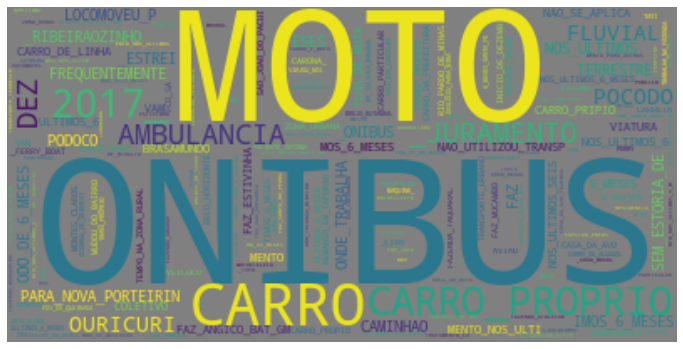

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="gray", min_font_size=3, ).generate(text)

fig, ax = plt.subplots(1, 1, figsize=(12,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Preparando para exportar

In [40]:
confirmados.select_dtypes('float').columns

Index(['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_PAIS', 'FEBRE', 'FRAQUEZA',
       'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'HIV',
       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CRITERIO', 'TPAUTOCTO', 'CO_UF_INF',
       'DOENCA_TRABALHO', 'EVOLUCAO', 'DS_MUN_1', 'CO_UF_1', 'CO_PAIS_1',
       'DS_MUN_2', 'CO_UF_2', 'CO_PAIS_2', 'DS_MUN_3', 'CO_UF_3', 'CO_PAIS_3',
       'IDADE'],
      dtype='object')

In [41]:
#exceto peso e idade, tudo pro tipo int
cols = ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_PAIS', 'FEBRE', 'FRAQUEZA',
       'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'HIV',
       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'DROGA', 'DOSE', 
       'AMPOLAS', 'FALENCIA', 'CRITERIO', 'TPAUTOCTO', 'CO_UF_INF',
       'DOENCA_TRABALHO', 'EVOLUCAO', 'DS_MUN_1', 'CO_UF_1', 'CO_PAIS_1',
       'DS_MUN_2', 'CO_UF_2', 'CO_PAIS_2', 'DS_MUN_3', 'CO_UF_3', 'CO_PAIS_3']
confirmados[cols] = confirmados[cols].astype(np.float).astype("Int32")

In [42]:
confirmados.to_csv('../data/interim/leivis/casos_confirmados_full_limpos.csv',index=False)

## O Porquê de os dados do SINAN não serem tão confiáveis 

### integridade dos dados para cálculo de alguns indicadores.

In [43]:
# seguindo a mesma linha, temos uma inconsistência:
# quando o campo TPAUTOCTO == 2, ou seja, não é autoctone, o codigo de município de
# infecção deveria ser diferente do de residência.
# pq isso acontece? seria erro na inserção ou o local de residência foi atualizado?

# por essa razão esses campos não serão atualizados, pois não há como saber se a alteração seria correta.

display(
    df.loc[
        df.TPAUTOCTO == 2, 
        ['ID_MN_RESI','COMUNINF', 'SG_UF', 'COUFINF', 'ID_PAIS', 'COPAISINF', 'ENTRADA', 'TPAUTOCTO']
    ].head()
)

,ID_MN_RESI,COMUNINF,SG_UF,COUFINF,ID_PAIS,COPAISINF,ENTRADA,TPAUTOCTO
5,110070,NaN,11,NaN,1.0,1,1.0,2.0
7,110030,313630.0,11,31.0,1.0,1,NaN,2.0
86,140045,140045.0,14,14.0,1.0,1,1.0,2.0
143,260415,260415.0,26,26.0,1.0,1,1.0,2.0
190,260200,260200.0,26,26.0,1.0,1,2.0,2.0


In [44]:
# NU_IDADE_N, idade no dia da notificação, não é confiável. 
# ex.: nascido em 2005-08-05 e notificado em 2018-05-09 foi declarado com idade em 0 dias (prefixo 2)
# descartar e caso necessário saber a idade no dia da notificação calcular a diferença.

display(
    df.loc[
        df.NU_IDADE_N.astype('string').str.startswith('2'),
        ['DT_NASC', 'NU_IDADE_N', 'DT_NOTIFIC', 'DT_OBITO']
    ].head()
)

,DT_NASC,NU_IDADE_N,DT_NOTIFIC,DT_OBITO
10,2005-08-05,2000,2018-05-09,NaN
249,2016-03-29,2010,2016-04-13,NaN
299,2016-03-10,2000,2016-04-11,NaN
395,1937-06-17,2000,2016-03-17,2016-04-01
506,2011-01-14,2000,2011-11-25,NaN


In [45]:
# menos de 1% de missing
print(f'''DT_NASC % de nulos (confirmados): {round(df.DT_NASC.isnull().mean(), 3)}''')

DT_NASC % de nulos (confirmados): 0.01


In [46]:
display(df.ID_PAIS.value_counts(dropna=False).to_frame())

,ID_PAIS
1.0,122501
NaN,1


País de infecção é Brasil?


In [47]:
df['COPAISINF'].isnull().mean(),df['COPAISINF'].isnull().mean()

(0.0, 0.0)

In [48]:
# Para calcular indicador 14 são necessários os locais de infecção: país, uf e município
# 'COMUNINF', 'COUFINF', 'COPAISINF'
display(
    df.loc[
        (df.CLASSI_FIN == 1.0), 
        ['COMUNINF', 'COUFINF', 'COPAISINF']
    ].isnull().mean().to_frame('Confirmados % nulos')
)
display(
    df.loc[
        (df.CLASSI_FIN == 2.0), 
        ['COMUNINF', 'COUFINF', 'COPAISINF']
    ].isnull().mean().to_frame('Descartados % nulos')
)

,Confirmados % nulos
COMUNINF,0.095229
COUFINF,0.094999
COPAISINF,0.000000


,Descartados % nulos
COMUNINF,1.0
COUFINF,1.0
COPAISINF,0.0


In [49]:
# primeiro problema: não há valores nulos, mas há valores fora do intervalo do dicionário. 
# O que significam?
display(df.loc[(df.CLASSI_FIN == 1.0), 'COPAISINF'].value_counts(dropna=False).to_frame('Total Confirmados'))
display(df.loc[(df.CLASSI_FIN == 2.0), 'COPAISINF'].value_counts(dropna=False).to_frame('Total Descartados'))

,Total Confirmados
1,43335
0,4500
126,3
138,3
68,3
111,2
199,2
92,1
177,1
44,1


,Total Descartados
0,65326


- exporta para ser usado em cálculos